# ADASYN
finds out nearest sample for every sample of minority class (in this case rejected)
also consider the majority class around it

## Nearest neighbor concept
#### if k =1 then joins the point to the nearest another point
#### if k =2 then joins the point to two of the nearest points
#### if k =3 then joins the point to three of the nearest  points

then artificially generate points on these lines from nearest neighbor

In [1]:
# !pip install --upgrade scikit-learn

In [2]:
# !pip install imblearn

In [3]:
from imblearn.over_sampling import ADASYN

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split, KFold


In [6]:
from sklearn.model_selection import cross_val_predict

In [7]:
df= pd.read_csv("loan_final.csv")

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
df.shape

(4269, 13)

In [10]:
n_rows, n_columns = df.shape
print('number of rows', n_rows)
print('number of columns', n_columns)


number of rows 4269
number of columns 13


In [11]:
#Get count of number of M or B cells in diagnosis
df['status'].value_counts()

 Approved    2656
 Rejected    1613
Name: status, dtype: int64

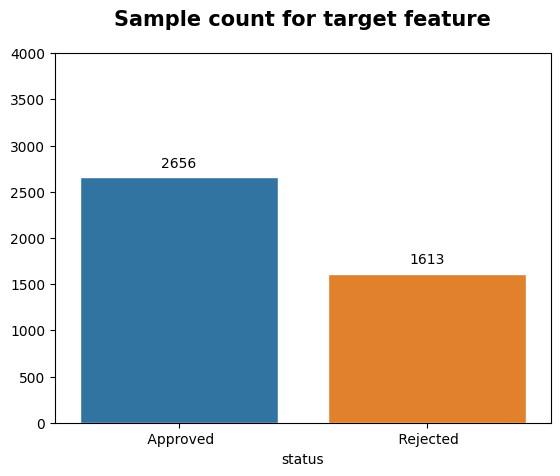

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= "status",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 4000)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for preprocessing
loan_data_preprocessed = df.copy()

# Initialize label encoders for categorical variables
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_status = LabelEncoder()

# Encode categorical variables
loan_data_preprocessed[' education'] = le_education.fit_transform(loan_data_preprocessed[' education'])
loan_data_preprocessed[' self_employed'] = le_self_employed.fit_transform(loan_data_preprocessed[' self_employed'])
loan_data_preprocessed['status'] = le_status.fit_transform(loan_data_preprocessed['status'])


In [14]:
loan_data_preprocessed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [15]:
X= loan_data_preprocessed.drop(["loan_id", "status"], axis= "columns")

In [16]:
X.shape

(4269, 11)

In [17]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [18]:
Y= loan_data_preprocessed["status"]

Y.head()

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [19]:
Y.shape

(4269,)

## Preprocessing
#### 1. Split into train test
#### 2. Standardization

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.2, random_state= 42)

In [21]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [22]:
test_array = np.array(Y_test)
print(test_array)

[1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 

In [23]:
test_array.shape

(854,)

# Before Applying ADASYN
## Approved - 2120
## Rejected - 1295

In [24]:


unique, count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 2120, 1: 1295}

In [25]:
from imblearn.over_sampling import ADASYN

# Using ADASYN for generating synthetic samples
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_res, Y_train_res = adasyn.fit_resample(X_train_scaled, Y_train)


In [26]:
unique, count = np.unique(Y_train_res,return_counts = True)
Y_train_res_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_train_res_dict_value_count

{0: 2120, 1: 2204}

# Why not equal? (READ NOTES.rtf)
Density Distribution: ADASYN generates synthetic samples depending on the density distribution of the minority class. It aims to 'adaptively' generate more synthetic samples near the borderline than in the areas where the minority class is well represented. Therefore, the exact number of synthetic samples generated for each class can vary based on the learning difficulties identified by the algorithm.

sampling_strategy=1.0 Interpretation: When using ADASYN, setting sampling_strategy=1.0 attempts to make the classes balanced, but the final count is influenced by the algorithm's adaptive nature. The goal is to achieve a better balance, but the exact number of samples generated for each class is determined by the algorithm's internal mechanism, which focuses on areas of the feature space where the classifier's performance could benefit from more samples of the minority class.

Algorithmic Variability: The internal workings of ADASYN take into account the distribution of the data and the minority class's neighborhood characteristics. As a result, the number of samples generated to balance the classes is not fixed but varies according to the complexity of the data in regions where the minority class overlaps with the majority class or is close to the decision boundary.

In summary, after applying ADASYN, the class distribution is closer to being balanced, but the counts of the classes might not be exactly equal due to the algorithm's adaptive synthetic sampling approach. This approach is designed to improve the classifier's performance by focusing on the regions where the minority class is harder to learn, rather than strictly balancing the class counts.

# After Applying ADASYN
## Approved - 2120
## Rejected - 2204

## Resampled data X_train_res and Y_train_res

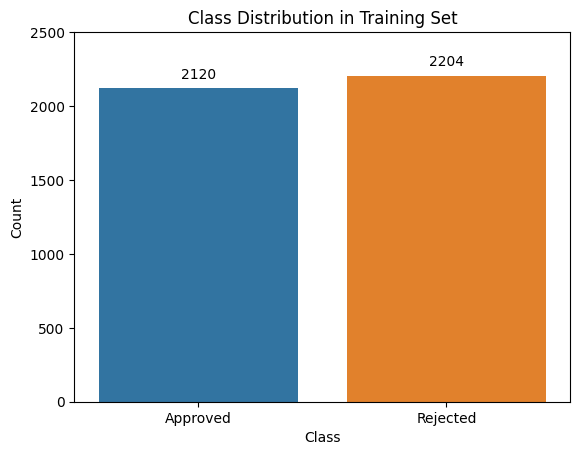

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Your code to create the dictionary
unique, count = np.unique(Y_train_res, return_counts=True)
Y_train_res_dict_value_count = {k: v for (k, v) in zip(unique, count)}
Y_train_res_dict_value_count = {'Approved': count[0], 'Rejected': count[1]}

# Set maximum limit on the y-axis
plt.ylim(0, 2500)

# Create a bar plot using Seaborn
ax = sns.barplot(x=list(Y_train_res_dict_value_count.keys()), y=list(Y_train_res_dict_value_count.values()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')

# Display count on top of each bar as an integer
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# LOGISTIC REGRESSION code from here

# Before Parameter tuning

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train_res, Y_train_res)

LogisticRegression()

In [31]:
predictions = model.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, predictions)
classification_report = classification_report(Y_test, predictions)
confusion_matrix = confusion_matrix(Y_test, predictions)

In [33]:
print(accuracy)

0.9121779859484778


In [34]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       536
           1       0.84      0.95      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854



In [35]:
confusion_matrix

array([[478,  58],
       [ 17, 301]])

## Before parameter tuning accuracy= 0.912

# Hyper parameter tuning using GridSearchCV

In [36]:
# Hyper parameter tuning and cross validation for the Logistic Regression model

from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(LogisticRegression(max_iter=1000), {
    'C': [0.01, 0.1, 0.5, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'] 
}, cv=5, return_train_score=False)

grid.fit(X_train_res,Y_train_res)
grid = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score', ascending=True)
grid[['param_C', 'param_penalty', 'param_solver', 'mean_test_score', 'rank_test_score']].head()

,param_C,param_penalty,param_solver,mean_test_score,rank_test_score
9,0.1,l1,liblinear,0.932007,1
13,0.1,l2,liblinear,0.930158,2
4,0.01,l2,lbfgs,0.929233,3
6,0.01,l2,newton-cg,0.929233,3
7,0.01,l2,newton-cholesky,0.929233,3


## Best parameters were C=0.1, penalty='l1', solver='liblinear'

In [37]:
# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#  X, Y are feature and target variables

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with best parameters
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
LR_best.fit(X_train_res, Y_train_res)

# Make predictions on the test set
Y_pred = LR_best.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

#print accuracy
accuracy_tuning = accuracy_score(Y_test, Y_pred)
print(accuracy_tuning)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[474  62]
 [ 12 306]]
0.9133489461358314
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       536
           1       0.83      0.96      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854



# After parameter tuning accuracy = 0.91334

# Confusion Matrix

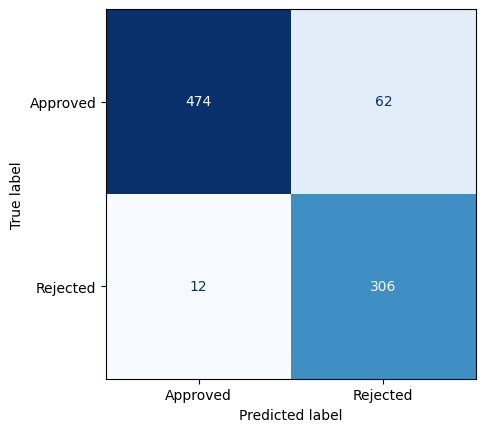

In [39]:
# Visualize the confusion matrix
category=['Approved', 'Rejected']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category)
disp = disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.show()

# AUC this is gives the measure of the model independent to the threshold used for classification

AUC: 0.9284340632653224


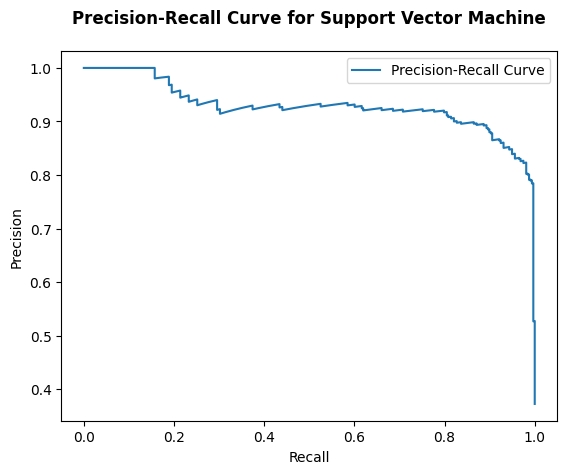

In [40]:
from sklearn.metrics import precision_recall_curve, auc
# Obtain predicted probabilities for the positive class
Y_proba = LR_best.predict_proba(X_test_scaled)[:, 1]
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
# Plot the precision-recall curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine',pad= 20, fontweight= "bold")
plt.legend()
plt.show()

In [41]:
incorrect_predictions = X_test[Y_test != Y_pred]
print("Incorrect predictions:", incorrect_predictions)

Incorrect predictions:        no_of_dependents   education   self_employed   income_annum  \
3839                  2           1               1        5100000   
1130                  1           1               0         300000   
3402                  3           1               1        9200000   
3624                  1           1               1         800000   
3490                  1           0               0        4700000   
...                 ...         ...             ...            ...   
1721                  3           1               1        3100000   
1456                  4           0               1        1500000   
1812                  5           1               0        9000000   
1288                  3           1               0        5900000   
1237                  2           1               1        9500000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
3839      16800000           2           504                 

In [42]:
incorrect_predictions.shape

(74, 11)

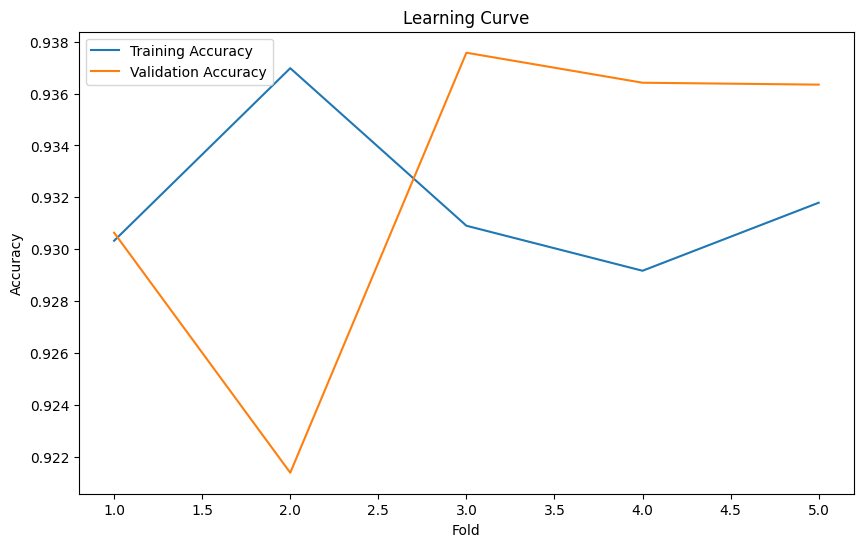

Confusion Matrix:
 [[1916  204]
 [  90 2114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2120
           1       0.91      0.96      0.93      2204

    accuracy                           0.93      4324
   macro avg       0.93      0.93      0.93      4324
weighted avg       0.93      0.93      0.93      4324



In [43]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resampling using ADASYN
# Using ADASYN for generating synthetic samples
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_res, Y_train_res = adasyn.fit_resample(X_train_scaled, Y_train)

# Pick the best Logistic Regression model
LR_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)

# Initialize KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(X_train_res):
    # Create training and validation subsets
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    Y_train_fold, Y_val_fold = Y_train_res[train_index], Y_train_res[val_index]

    # Train the Logistic Regression model on the fold
    LR_best.fit(X_train_fold, Y_train_fold)

    # Calculate training and validation accuracy
    train_accuracy = LR_best.score(X_train_fold, Y_train_fold)
    val_accuracy = LR_best.score(X_val_fold, Y_val_fold)

    # Store the results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(1, 6), val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Correct use of cross_val_predict on resampled data
Y_pred_cv = cross_val_predict(LR_best, X_train_res, Y_train_res, cv=5)  

# Calculate confusion matrix and classification report on resampled training data
conf_matrix = confusion_matrix(Y_train_res, Y_pred_cv)
class_report = classification_report(Y_train_res, Y_pred_cv)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


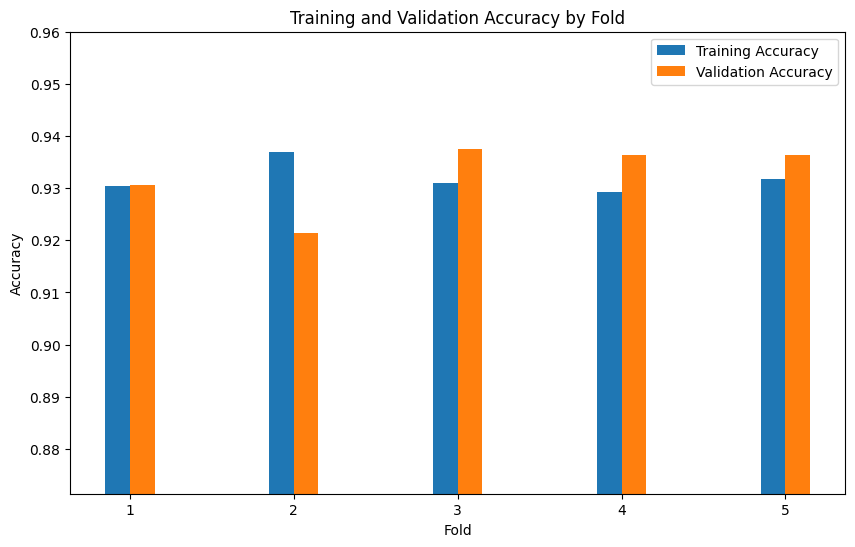

In [44]:

# Assuming train_accuracies and val_accuracies are filled as before
folds = np.arange(1, 6)  # Folds ranging from 1 to 5

# Calculate the minimum and maximum accuracy values across both training and validation accuracies
min_accuracy = min(min(train_accuracies), min(val_accuracies))
max_accuracy = max(max(train_accuracies), max(val_accuracies))

# Expand the range slightly to ensure all bars are comfortably within the plot area
min_lim = max(0, min_accuracy - 0.05)  # Ensure minimum is not less than 0
max_lim = min(0.96, max_accuracy + 0.05)  # Ensure maximum is not more than 1

plt.figure(figsize=(10, 6))

# Adjust the width for clarity
width = 0.15

# Plotting both the training and validation accuracies as bar charts
plt.bar(folds - width/2, train_accuracies, width, label='Training Accuracy')
plt.bar(folds + width/2, val_accuracies, width, label='Validation Accuracy')

# Setting the y-axis to focus on the range of interest
plt.ylim([min_lim, max_lim])

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Fold')
plt.xticks(folds)

# Adding a legend
plt.legend(loc='best')

plt.show()

# -----------------------------

# SVM code from here